In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib.backends.backend_pdf import PdfPages

In [38]:
def line_plot(df, x, y, color, style, show):
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x=x, y=y, hue=color, style=style, ax=ax, errorbar='sd', err_style="band")
    if y == 'silhouette average':
        plt.ylim(-0.3, 0.7)
    if y == 'lisi average':
        plt.ylim(1, 5)
    if 'adjusted rand index' in  y:
        plt.ylim(-0.2, 1)
    if show == True:
        plt.show()
    plt.close(fig)
    return fig

In [ ]:
#dir = '/Users/memarchand/Project/Spatial-Transcriptomics/PDAC/clustering/work/cd/5ca52700255f26d1368324d735563b'
table_list = "['Visium_FFPE_V44L23-391_D_ref_final_table.csv','Visium_FFPE_V44L23-391_D_sim_2_final_table.csv','Visium_FFPE_V44L23-391_D_sim_1_final_table.csv']"

#Input
sample_name = 'Visium_FFPE_V43T08-051_D'

refine = 'false'

In [40]:
import ast
if isinstance(table_list, str):
    table_list = ast.literal_eval(table_list)

In [41]:
tables = []
for table_name in table_list:
    table = pd.read_csv(table_name)
    suffix = os.path.basename(table_name).replace(sample_name, '').strip('_')
    colname = suffix.replace('_final_table','').replace('.csv','')
    table['dataset'] = colname
    tables.append(table)
table_all = pd.concat(tables, ignore_index=True)

In [42]:
output = f'{sample_name}_final_graphs.pdf'
metric_list = ['silhouette average', 'lisi average', 'adjusted rand index (sctype + uscore label)']

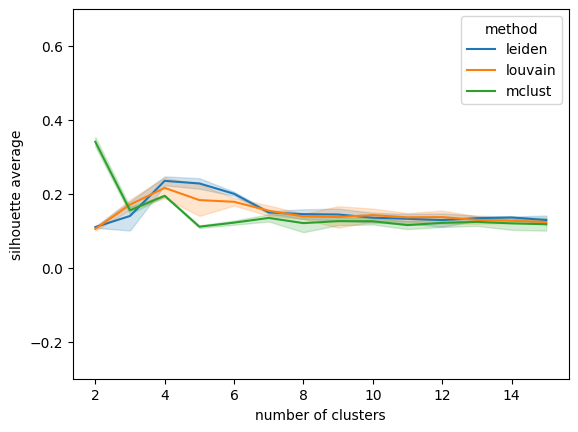

Figure(640x480)


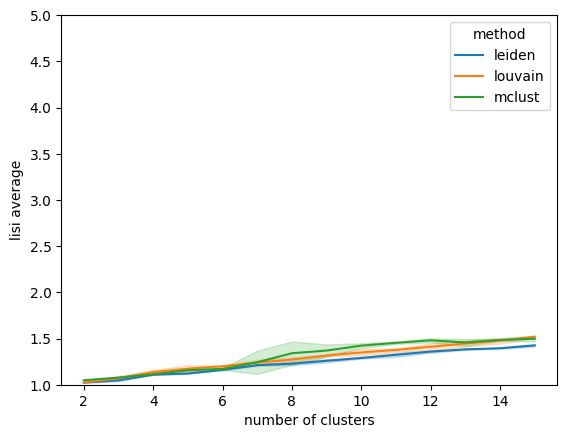

Figure(640x480)


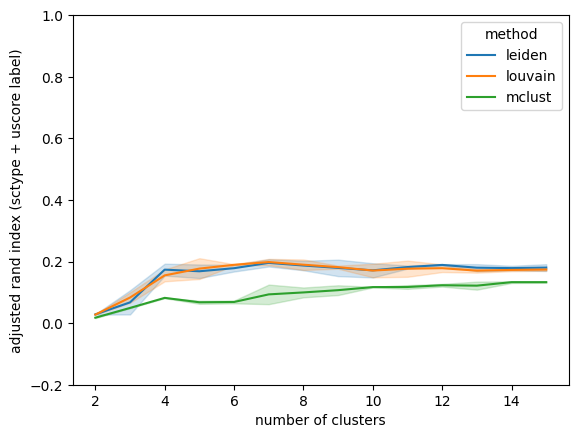

Figure(640x480)


In [43]:
if refine=='true':
    final_table = table
    style = 'refinement'
else:
    final_table = table_all.loc[table_all['refinement']==False,:]
    style = None
with PdfPages(output) as pdf:
    for metric in metric_list:
        fig = line_plot(final_table, 'number of clusters', metric, 'method', style, show=True)
        print(fig)
        pdf.savefig(fig)
